In [21]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [22]:
from google.colab import drive
drive.mount('/content/drive')
path= '/content/drive/MyDrive/dataset/stronger.csv'
df= pd.read_csv(path, sep=',')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,HP,ATK,DEF,Ascension Stat,Ascension Stat Value,Model,Element,Weapon,Sex,Nation
0,Albedo,13225,251,876,Geo DMG Bonus,28.80%,Medium,Geo,Sword,Male,Mondstadt
1,Aloy,10898,233,676,Liyue DMG Bonus,28.80%,Medium,Cryo,Bow,Female,Mondstadt
2,Amber,9461,223,600,ATK,24.00%,Medium,Pyro,Bow,Female,Mondstadt
3,Arataki Itto,12858,227,959,CRIT Rate,19.20%,Tall,Geo,Claymore,Male,Mondstadt
4,Barbara,9787,159,668,HP,24.00%,Medium,Pyro,Catalyst,Female,Mondstadt


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  58 non-null     object
 1   HP                    58 non-null     int64 
 2   ATK                   58 non-null     int64 
 3   DEF                   58 non-null     int64 
 4   Ascension Stat        58 non-null     object
 5   Ascension Stat Value  58 non-null     object
 6   Model                 58 non-null     object
 7   Element               58 non-null     object
 8   Weapon                58 non-null     object
 9   Sex                   58 non-null     object
 10  Nation                58 non-null     object
dtypes: int64(3), object(8)
memory usage: 5.1+ KB


**Defining color palette** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

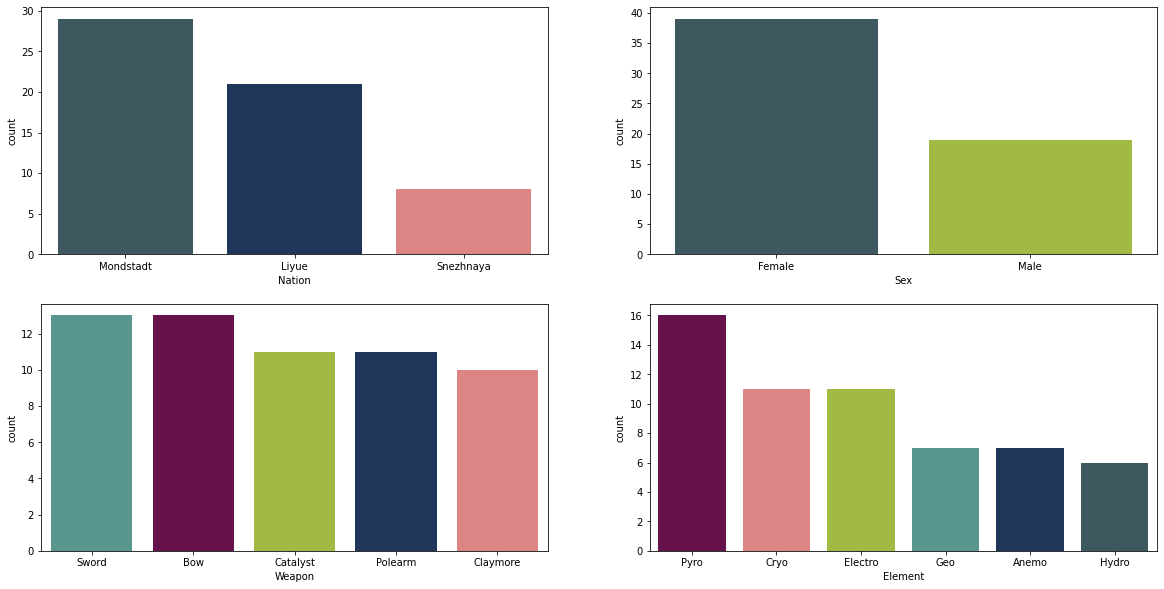

In [24]:
element ={"Pyro": "#750550", "Hydro": "#395B64", "Geo": "#4FA095", "Anemo": "#153462", "Electro" : "#ABCE30", "Cryo": "#E97777"}
nation ={"Mondstadt": "#395B64", "Liyue": "#153462", "Snezhnaya": "#E97777"}
weapon ={"Sword": "#4FA095", "Bow": "#750550", "Catalyst": "#ABCE30", "Claymore": "#E97777","Polearm" : "#153462"}
Type ={"Male": "#ABCE30", "Female": "#395B64", "Player's Choice": "#750550"}

final = dict(weapon)
final.update(element)
final.update(nation)
final.update(Type)

categorical = ['Nation', 'Sex', 'Weapon', 'Element']
numerical = ['ATK', 'DEF']

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot, palette = final, order = df[variable].value_counts().index)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

**Comparing Element: Mondstadt vs Liyue**

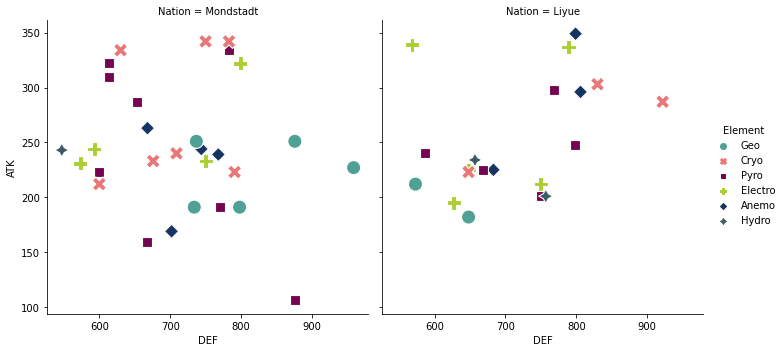

In [25]:
snezhnaya = df["Nation"]!="Snezhnaya"
Inazuma = df["Nation"]!="Inazuma"
traveler = df["Name"]!="Traveler"

sns.relplot(
    data=df[snezhnaya & traveler & Inazuma], x="DEF", y="ATK",
    col="Nation", hue="Element", style="Element",
    kind="scatter", s = 200, palette = final
)

**Comparing Weapon Type: Mondstadt vs Liyue**

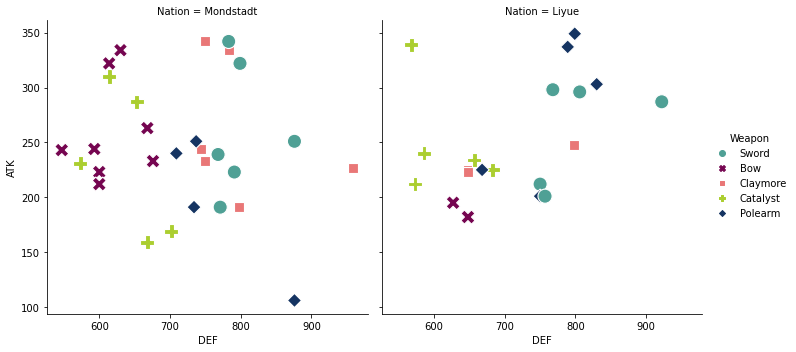

In [26]:
sns.relplot(
    data=df[snezhnaya & traveler], x="DEF", y="ATK",
    col="Nation", hue="Weapon", style="Weapon",
    kind="scatter", s = 200, palette = final
)     

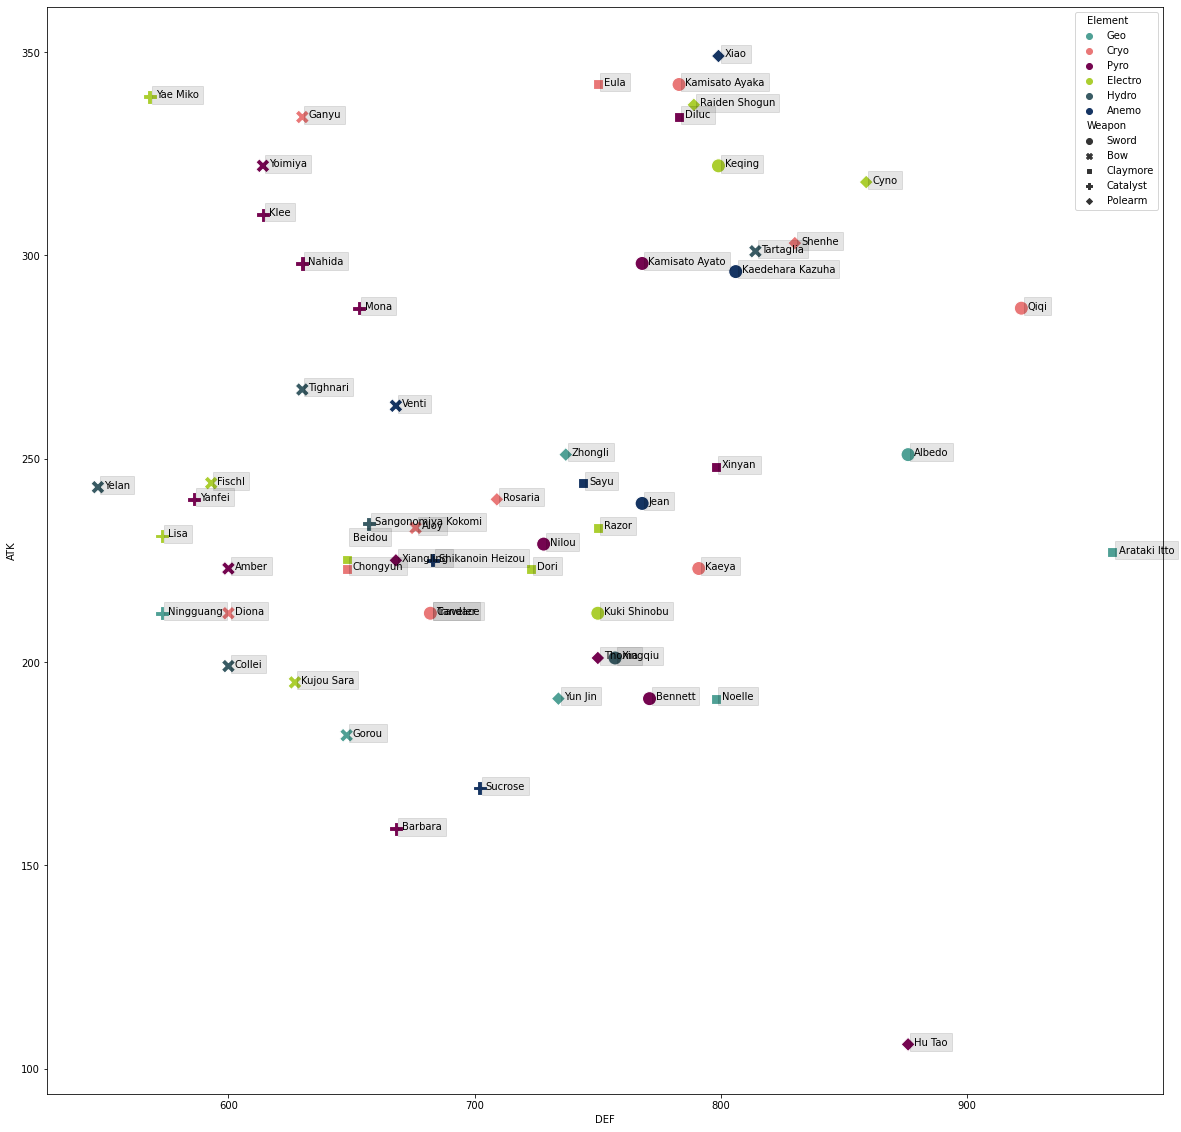

In [27]:
plt.figure(figsize=(20,20)) 
sns.scatterplot(x=df['DEF'], y=df['ATK'], hue = df["Element"], style = df["Weapon"], palette = final, s = 200);

for i in range(df.shape[0]):
    plt.text(x=df.DEF[i]+2.5,y=(df.ATK[i]+5 if df.Name[i]=="Beidou" else df.ATK[i]-0.2),s=df.Name[i], 
          fontdict=dict(color='black',size=10),
          bbox=dict(facecolor='black',alpha=0.1))